In [16]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

# OEM EGTM data

The figure below shows the EGTM over time from KLM/AF and some clients (Finnair). This helps to see how engines are delivered to customers, where the variation is also visible. 

There seems to be a shift before and after 2005. This is confirmed in the table below.

| Range          | # of Samples | Mean | Std. Dev |
|----------------|--------------|------|----------|
| All Samples    | 72           | 29.8 | 8.1      |
| 2001 - 2005    | 41           | 27.7 | 9.7      |
| 2005 - Onwards | 31           | 32.5 | 4.4      |

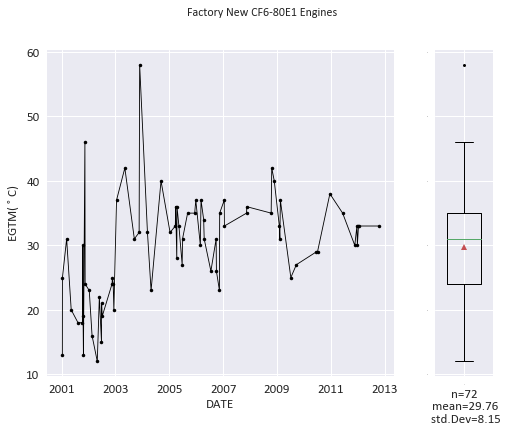

In [67]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import gridspec
from pandas import Series, DataFrame, Panel

font = {'family' : 'Calibri',
        'size'   : 15}

df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/01 EGTM Data Base Plots and Analysis.xlsx',
                   'Factory New (A3)')

x = pd.Series(df['DATE'])
y = pd.Series(df['EGTM'])

f = plt.figure(figsize=(8,6))
gs = gridspec.GridSpec(1,2, width_ratios=[6,1])
plt.grid(axis='y', which="major", linestyle='dotted', linewidth=0.4)

ax1 = plt.subplot(gs[0])
ax1.set(xlabel=('DATE'),ylabel=('EGTM($^\circ$C)'))
ax1.plot_date(x , y, fmt="ko-", markersize=3.5, linewidth=0.85)
ax1.xaxis.label.set_size(13)
ax1.yaxis.label.set_size(13)
ax1.tick_params(axis='both', labelsize=13)

ax2 = plt.subplot(gs[1])
ax2.set(xlabel='n=72\n mean=29.76\n std.Dev=8.15')
ax2.boxplot(df['EGTM'], showmeans=True, widths = 0.6, sym='k.')
ax2.xaxis.label.set_size(13)
ax2.tick_params(axis='both', labelsize=1)

f.suptitle('Factory New CF6-80E1 Engines')

plt.show()


# Violinplot of EGTM for KLM/AF & Clients (All shop visits)

The following graph shows a categorical scatterplot with non-overplapping points, with a combination of a kernel desnity estimate and a boxplot, where the maximum, minimum and, mean points can be observed as well as the outliers.

With this information it was assumed that the average range of EGTM is between 27 to 37 degrees, with a sample of 131 engines, where 101 correspond to KLM/AF while the rest to differnt clients.

This will be further used to categorize the engines in order to find relations with the AM simulation.


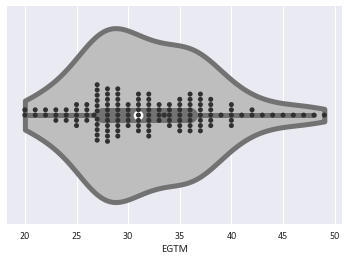

In [61]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/01 EGTM Data Base Plots and Analysis.xlsx',
                   'KLM&Clients')

x = df["EGTM"]

sns.violinplot(x, cut=0, color='#BEBEBE', linewidth=5, saturation=0.5)
sns.swarmplot(x, color='#303030', alpha=1)


# KLM/AF vs Clients

The information below shows the differences between KLM and Client. 

| Owner  | # Observations |  Mean | Variance | Std.Dev | 1st SV (# Obs) | 2nd SV (# Obs) | 3rd SV (# Obs) |
|--------|:--------------:|:-----:|:--------:|:-------:|:--------------:|:--------------:|:--------------:|
| All    |       131      | 31.93 |   36.90  |   6.07  |       82       |       47       |        2       |
| KLM    |       101      | 32.02 |   37.76  |   6.15  |       60       |       40       |        1       |
| CLIENT |       30       | 31.60 |   36.32  |   6.03  |       22       |        7       |        1       |

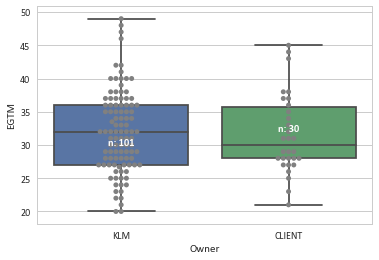

In [86]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

font = {'family' : 'Calibri',
        'size'   : 15}

matplotlib.rc('font', **font)

df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/01 EGTM Data Base Plots and Analysis.xlsx',
                   'KLM&Clients')

ax = sns.boxplot(y="EGTM",x="Owner", data=df)

# Calculate number of obs per group & median to position labels
medians = df.groupby(['Owner'])['EGTM'].median().values
nobs = df['Owner'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
            horizontalalignment='center', size='x-small', color='w', weight='semibold')

# Add jitter with the swarmplot function.
ax = sns.swarmplot(x='Owner', y='EGTM', data=df, color="grey")

The plot below shows that in general Client engines have more variation between CSN and TSN, therfore the flight leg will be used to compare future plots, this also helps since some engines have more flight time per cycle.

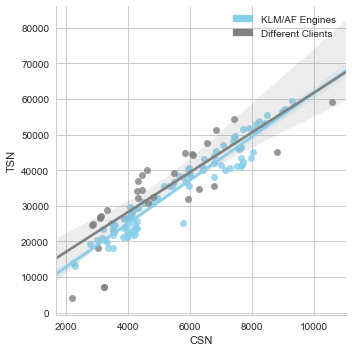

In [78]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/01 EGTM Data Base Plots and Analysis.xlsx',
                   'KLM&Clients')

sns.set_style("whitegrid")
sns.lmplot(x="CSN", y="TSN", data=df, hue="Owner", fit_reg=True, palette=dict(KLM="skyblue",CLIENT="gray"), legend=False)

red_patch = mpatches.Patch(color='skyblue', label='KLM/AF Engines')
black_patch = mpatches.Patch(color='gray', label='Different Clients')
plt.legend(handles=[red_patch,black_patch])

plt.show()

# AM Results

## All Shop Visits

Calculated $EGT (C)$ vs $T_{amb}$

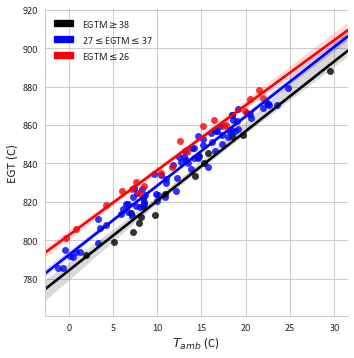

In [177]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/02 AM Simulation.xlsx',
                   'KLM&Clients(NEW)')

plot = sns.lmplot(y="EGT [C]2", x="TT2 [C]", data=df, hue="EGT_GROUP", fit_reg=True, palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
red_patch = mpatches.Patch(color='red', label='EGTM$\leq$26')
black_patch = mpatches.Patch(color='black', label='EGTM$\geq$38')
blue_patch = mpatches.Patch(color='blue',label='27$\leq$EGTM$\leq$37')
plt.legend(handles=[black_patch,blue_patch,red_patch])
plt.xlabel('$T_{amb}$ (C)',fontsize=13)
plt.ylabel('EGT (C)',fontsize=13)
plt.show()

Calculated $N2 (\%)$ vs $T_{amb}$

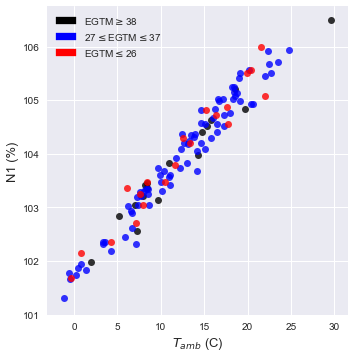

In [18]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/02 AM Simulation.xlsx',
                   'KLM&Clients(NEW)')

plot = sns.lmplot(x="TT2 [C]", y="N%1 [%]", data=df, hue="EGT_GROUP", fit_reg=False, palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
red_patch = mpatches.Patch(color='red', label='EGTM$\leq$26')
black_patch = mpatches.Patch(color='black', label='EGTM$\geq$38')
blue_patch = mpatches.Patch(color='blue',label='27$\leq$EGTM$\leq$37')
plt.legend(handles=[black_patch,blue_patch,red_patch])
plt.xlabel('$T_{amb}$ (C)',fontsize=13)
plt.ylabel('N1 (%)',fontsize=13)
plt.show()

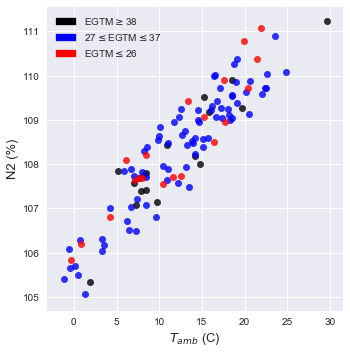

In [17]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/02 AM Simulation.xlsx',
                   'KLM&Clients(NEW)')

plot = sns.lmplot(x="TT2 [C]", y="N%2 [%]", data=df, hue="EGT_GROUP", fit_reg=False, palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
red_patch = mpatches.Patch(color='red', label='EGTM$\leq$26')
black_patch = mpatches.Patch(color='black', label='EGTM$\geq$38')
blue_patch = mpatches.Patch(color='blue',label='27$\leq$EGTM$\leq$37')
plt.legend(handles=[black_patch,blue_patch,red_patch])
plt.xlabel('$T_{amb}$ (C)',fontsize=13)
plt.ylabel('N2 (%)',fontsize=13)
plt.show()

Calculated $Exhaust Flow (kg/s)$ vs $T_{amb}$

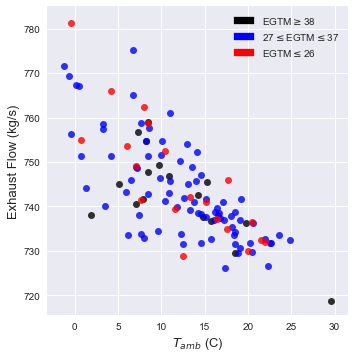

In [19]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/02 AM Simulation.xlsx',
                   'KLM&Clients(NEW)')

plot = sns.lmplot(x="TT2 [C]", y="W19 [kg/s]", data=df, hue="EGT_GROUP", fit_reg=False, palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
red_patch = mpatches.Patch(color='red', label='EGTM$\leq$26')
black_patch = mpatches.Patch(color='black', label='EGTM$\geq$38')
blue_patch = mpatches.Patch(color='blue',label='27$\leq$EGTM$\leq$37')
plt.legend(handles=[black_patch,blue_patch,red_patch])
plt.xlabel('$T_{amb}$ (C)',fontsize=13)
plt.ylabel('Exhaust Flow (kg/s)',fontsize=13)
plt.show()

$\Delta\eta$ vs $Flight Leg(hr/cycle)$ for all engines and all shop visits.

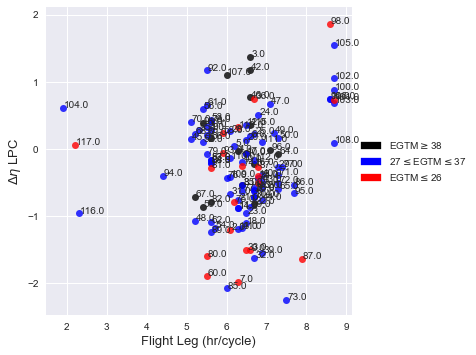

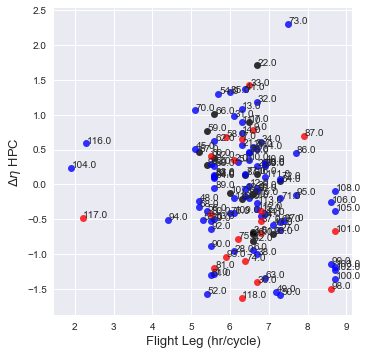

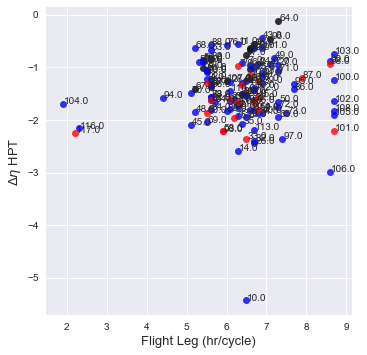

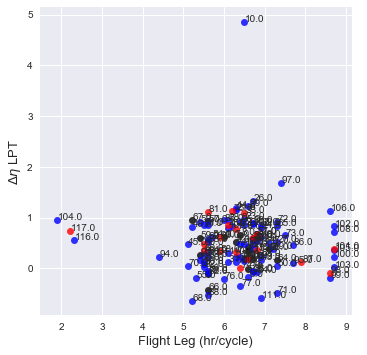

In [31]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/02 AM Simulation.xlsx',
                   'KLM&Clients(NEW)')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))


sns.lmplot(x="FLIGHT LEG", y="dEta_is_c_LPC_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False, palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
red_patch = mpatches.Patch(color='red', label='EGTM$\leq$26')
black_patch = mpatches.Patch(color='black', label='EGTM$\geq$38')
blue_patch = mpatches.Patch(color='blue',label='27$\leq$EGTM$\leq$37')
plt.legend(handles=[black_patch,blue_patch,red_patch],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Flight Leg (hr/cycle)',fontsize=13)
plt.ylabel('$\Delta\eta$ LPC',fontsize=13)
label_point(df['FLIGHT LEG'], df['dEta_is_c_LPC_1 [%]'], df['Point_am'], plt.gca())  

sns.lmplot(x="FLIGHT LEG", y="dEta_is_HPC_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.xlabel('Flight Leg (hr/cycle)',fontsize=13)
plt.ylabel('$\Delta\eta$ HPC',fontsize=13)
label_point(df['FLIGHT LEG'], df['dEta_is_HPC_1 [%]'], df['Point_am'], plt.gca()) 

sns.lmplot(x="FLIGHT LEG", y="dEta_is_HPT_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.xlabel('Flight Leg (hr/cycle)',fontsize=13)
plt.ylabel('$\Delta\eta$ HPT',fontsize=13)
label_point(df['FLIGHT LEG'], df['dEta_is_HPT_1 [%]'], df['Point_am'], plt.gca()) 

sns.lmplot(x="FLIGHT LEG", y="dEta_is_LPT_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.xlabel('Flight Leg (hr/cycle)',fontsize=13)
plt.ylabel('$\Delta\eta$ LPT',fontsize=13)
label_point(df['FLIGHT LEG'], df['dEta_is_LPT_1 [%]'], df['Point_am'], plt.gca())  

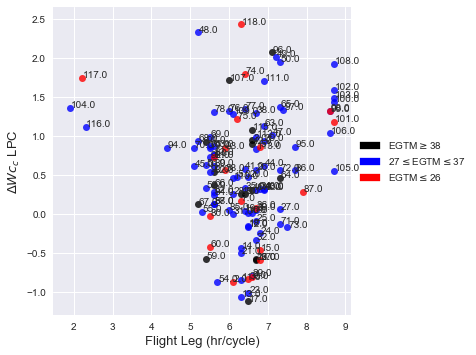

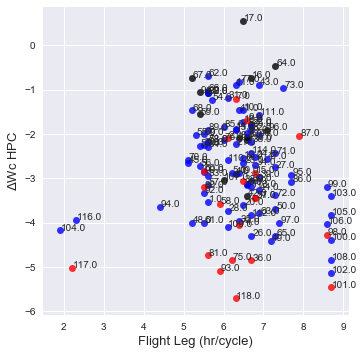

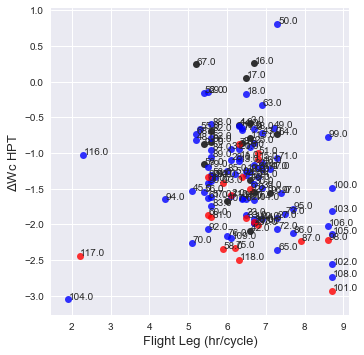

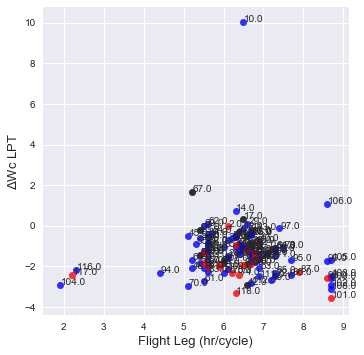

In [34]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/02 AM Simulation.xlsx',
                   'KLM&Clients(NEW)')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))


sns.lmplot(x="FLIGHT LEG", y="dWc_c_LPC_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False, palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
red_patch = mpatches.Patch(color='red', label='EGTM$\leq$26')
black_patch = mpatches.Patch(color='black', label='EGTM$\geq$38')
blue_patch = mpatches.Patch(color='blue',label='27$\leq$EGTM$\leq$37')
plt.legend(handles=[black_patch,blue_patch,red_patch],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Flight Leg (hr/cycle)',fontsize=13)
plt.ylabel('$\Delta Wc_c$ LPC',fontsize=13)
label_point(df['FLIGHT LEG'], df['dWc_c_LPC_1 [%]'], df['Point_am'], plt.gca())  

sns.lmplot(x="FLIGHT LEG", y="dWc_HPC_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.xlabel('Flight Leg (hr/cycle)',fontsize=13)
plt.ylabel('$\Delta$Wc HPC',fontsize=13)
label_point(df['FLIGHT LEG'], df['dWc_HPC_1 [%]'], df['Point_am'], plt.gca()) 

sns.lmplot(x="FLIGHT LEG", y="dWc_HPT_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.xlabel('Flight Leg (hr/cycle)',fontsize=13)
plt.ylabel('$\Delta$Wc HPT',fontsize=13)
label_point(df['FLIGHT LEG'], df['dWc_HPT_1 [%]'], df['Point_am'], plt.gca()) 

sns.lmplot(x="FLIGHT LEG", y="dWc_LPT_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.xlabel('Flight Leg (hr/cycle)',fontsize=13)
plt.ylabel('$\Delta$Wc LPT',fontsize=13)
label_point(df['FLIGHT LEG'], df['dWc_LPT_1 [%]'], df['Point_am'], plt.gca())  

$\Delta\eta$ vs $\Delta Wc$

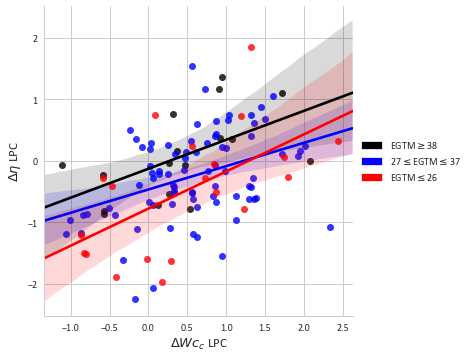

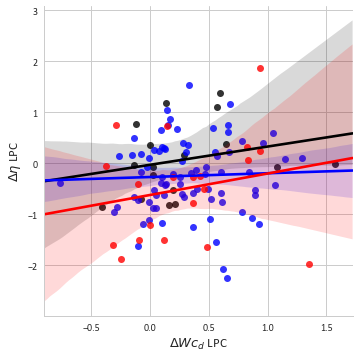

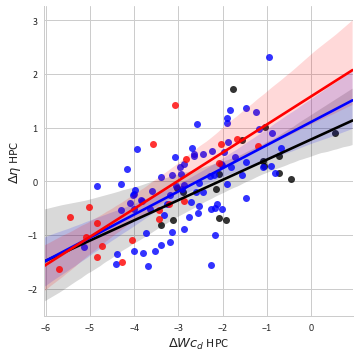

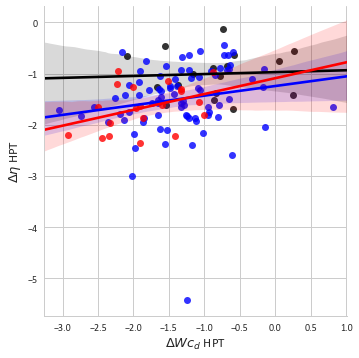

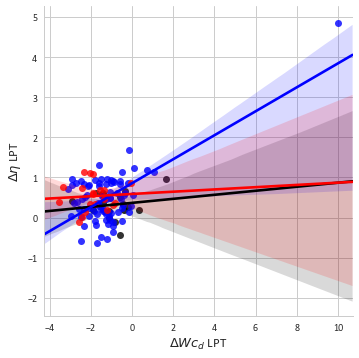

In [181]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/02 AM Simulation.xlsx',
                   'KLM&Clients(NEW)')
mine=dict(GOOD="k",BAD="r",REGULAR="b")



sns.lmplot(y="dEta_is_c_LPC_1 [%]", x="dWc_c_LPC_1 [%]", data=df, hue="EGT_GROUP", fit_reg=True, palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
red_patch = mpatches.Patch(color='red', label='EGTM$\leq$26')
black_patch = mpatches.Patch(color='black', label='EGTM$\geq$38')
blue_patch = mpatches.Patch(color='blue',label='27$\leq$EGTM$\leq$37')
plt.legend(handles=[black_patch,blue_patch,red_patch],loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('$\Delta\eta$ LPC',fontsize=13)
plt.xlabel('$\Delta Wc_c$ LPC',fontsize=13)

sns.lmplot(y="dEta_is_c_LPC_1 [%]", x="dWc_d_LPC_1 [%]", data=df, hue="EGT_GROUP", fit_reg=True,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.ylabel('$\Delta\eta$ LPC',fontsize=13)
plt.xlabel('$\Delta Wc_d$ LPC',fontsize=13)

sns.lmplot(y="dEta_is_HPC_1 [%]", x="dWc_HPC_1 [%]", data=df, hue="EGT_GROUP", fit_reg=True,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.ylabel('$\Delta\eta$ HPC',fontsize=13)
plt.xlabel('$\Delta Wc_d$ HPC',fontsize=13)

sns.lmplot(y="dEta_is_HPT_1 [%]", x="dWc_HPT_1 [%]", data=df, hue="EGT_GROUP", fit_reg=True,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.ylabel('$\Delta\eta$ HPT',fontsize=13)
plt.xlabel('$\Delta Wc_d$ HPT',fontsize=13)

sns.lmplot(y="dEta_is_LPT_1 [%]", x="dWc_LPT_1 [%]", data=df, hue="EGT_GROUP", fit_reg=True,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.ylabel('$\Delta\eta$ LPT',fontsize=13)
plt.xlabel('$\Delta Wc_d$ LPT',fontsize=13)


## First Shop Regular Type Visit

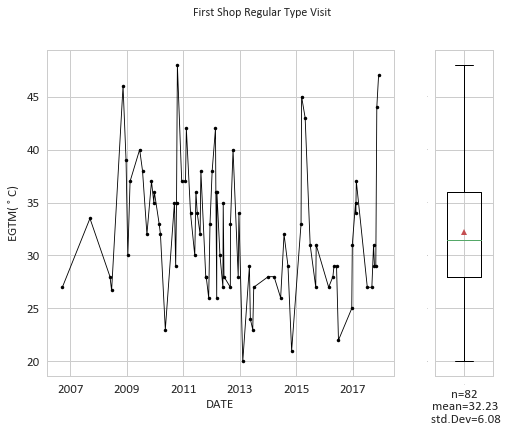

In [164]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import gridspec
from pandas import Series, DataFrame, Panel

font = {'family' : 'Calibri',
        'size'   : 15}

df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/01 EGTM Data Base Plots and Analysis.xlsx',
                   '1SV(KLM&Clients)')

x = pd.Series(df['DATE'])
y = pd.Series(df['EGTM'])

f = plt.figure(figsize=(8,6))
gs = gridspec.GridSpec(1,2, width_ratios=[6,1])
plt.grid(axis='y', which="major", linestyle='dotted', linewidth=0.4)

ax1 = plt.subplot(gs[0])
ax1.set(xlabel=('DATE'),ylabel=('EGTM($^\circ$C)'))
ax1.plot_date(x , y, fmt="ko-", markersize=3.5, linewidth=0.85)
ax1.xaxis.label.set_size(13)
ax1.yaxis.label.set_size(13)
ax1.tick_params(axis='both', labelsize=13)

ax2 = plt.subplot(gs[1])
ax2.set(xlabel='n=82\n mean=32.23\n std.Dev=6.08')
ax2.boxplot(df['EGTM'], showmeans=True, widths = 0.6, sym='k.')
ax2.xaxis.label.set_size(13)
ax2.tick_params(axis='both', labelsize=1)

f.suptitle('First Shop Regular Type Visit')

plt.show()


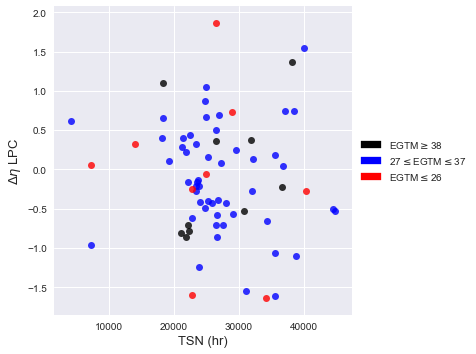

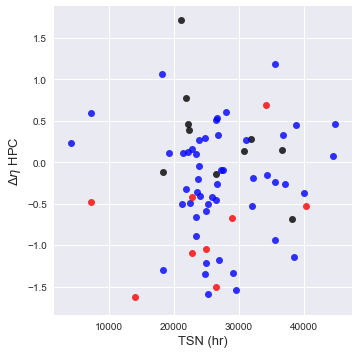

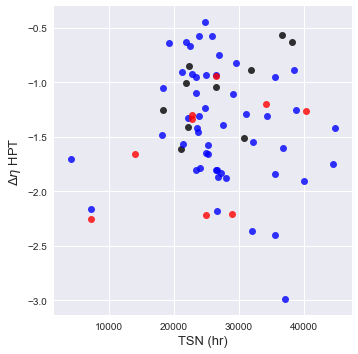

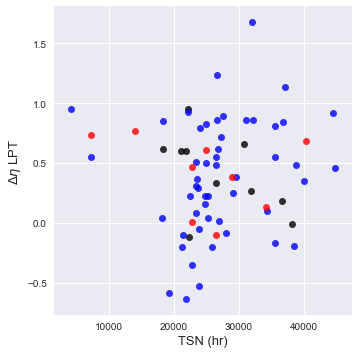

In [27]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/02 AM Simulation.xlsx',
                   'KLM&Clients(NEW)1SV')
mine=dict(GOOD="k",BAD="r",REGULAR="b")



sns.lmplot(x="TSN", y="dEta_is_c_LPC_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False, palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
red_patch = mpatches.Patch(color='red', label='EGTM$\leq$26')
black_patch = mpatches.Patch(color='black', label='EGTM$\geq$38')
blue_patch = mpatches.Patch(color='blue',label='27$\leq$EGTM$\leq$37')
plt.legend(handles=[black_patch,blue_patch,red_patch],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('TSN (hr)',fontsize=13)
plt.ylabel('$\Delta\eta$ LPC',fontsize=13)

sns.lmplot(x="TSN", y="dEta_is_HPC_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.xlabel('TSN (hr)',fontsize=13)
plt.ylabel('$\Delta\eta$ HPC',fontsize=13)

sns.lmplot(x="TSN", y="dEta_is_HPT_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.xlabel('TSN (hr)',fontsize=13)
plt.ylabel('$\Delta\eta$ HPT',fontsize=13)

sns.lmplot(x="TSN", y="dEta_is_LPT_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.xlabel('TSN (hr)',fontsize=13)
plt.ylabel('$\Delta\eta$ LPT',fontsize=13)

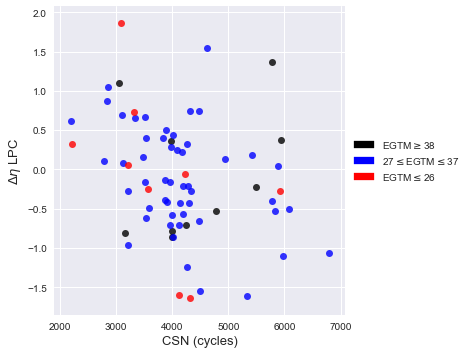

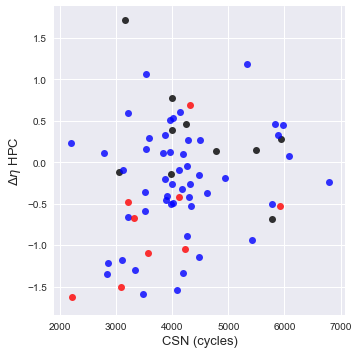

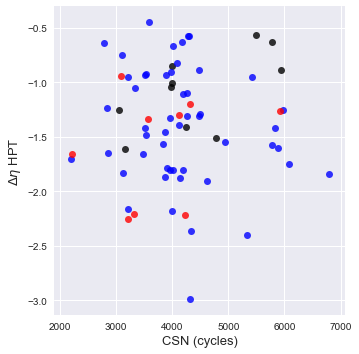

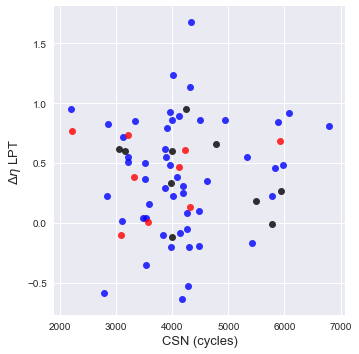

In [26]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/02 AM Simulation.xlsx',
                   'KLM&Clients(NEW)1SV')
mine=dict(GOOD="k",BAD="r",REGULAR="b")



sns.lmplot(x="CSN", y="dEta_is_c_LPC_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False, palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
red_patch = mpatches.Patch(color='red', label='EGTM$\leq$26')
black_patch = mpatches.Patch(color='black', label='EGTM$\geq$38')
blue_patch = mpatches.Patch(color='blue',label='27$\leq$EGTM$\leq$37')
plt.legend(handles=[black_patch,blue_patch,red_patch],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('CSN (cycles)',fontsize=13)
plt.ylabel('$\Delta\eta$ LPC',fontsize=13)

sns.lmplot(x="CSN", y="dEta_is_HPC_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.xlabel('CSN (cycles)',fontsize=13)
plt.ylabel('$\Delta\eta$ HPC',fontsize=13)

sns.lmplot(x="CSN", y="dEta_is_HPT_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.xlabel('CSN (cycles)',fontsize=13)
plt.ylabel('$\Delta\eta$ HPT',fontsize=13)

sns.lmplot(x="CSN", y="dEta_is_LPT_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.xlabel('CSN (cycles)',fontsize=13)
plt.ylabel('$\Delta\eta$ LPT',fontsize=13)

$\Delta\eta$ vs $Flight Leg(hr/cycle)$

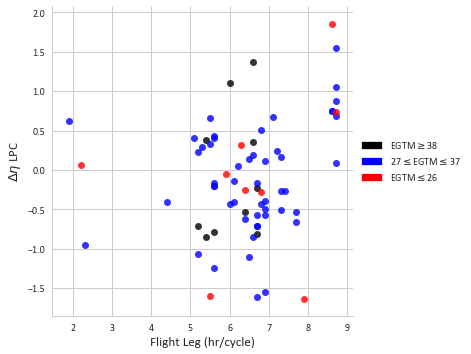

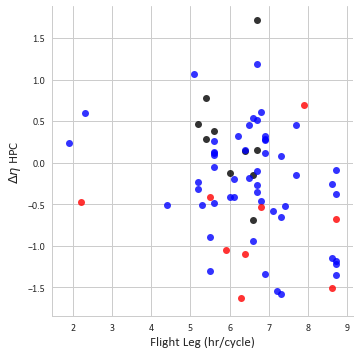

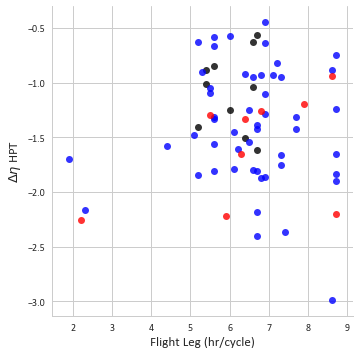

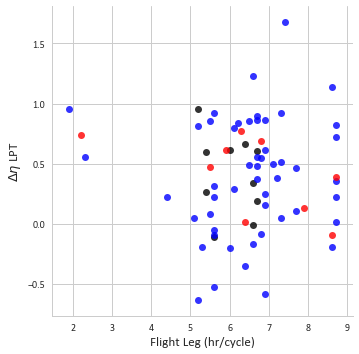

In [182]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/02 AM Simulation.xlsx',
                   'KLM&Clients(NEW)1SV')
mine=dict(GOOD="k",BAD="r",REGULAR="b")



sns.lmplot(x="FLIGHT LEG", y="dEta_is_c_LPC_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False, palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
red_patch = mpatches.Patch(color='red', label='EGTM$\leq$26')
black_patch = mpatches.Patch(color='black', label='EGTM$\geq$38')
blue_patch = mpatches.Patch(color='blue',label='27$\leq$EGTM$\leq$37')
plt.legend(handles=[black_patch,blue_patch,red_patch],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Flight Leg (hr/cycle)',fontsize=13)
plt.ylabel('$\Delta\eta$ LPC',fontsize=13)

sns.lmplot(x="FLIGHT LEG", y="dEta_is_HPC_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.xlabel('Flight Leg (hr/cycle)',fontsize=13)
plt.ylabel('$\Delta\eta$ HPC',fontsize=13)

sns.lmplot(x="FLIGHT LEG", y="dEta_is_HPT_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.xlabel('Flight Leg (hr/cycle)',fontsize=13)
plt.ylabel('$\Delta\eta$ HPT',fontsize=13)

sns.lmplot(x="FLIGHT LEG", y="dEta_is_LPT_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.xlabel('Flight Leg (hr/cycle)',fontsize=13)
plt.ylabel('$\Delta\eta$ LPT',fontsize=13)

$\Delta\eta$ vs $\Delta Wc$

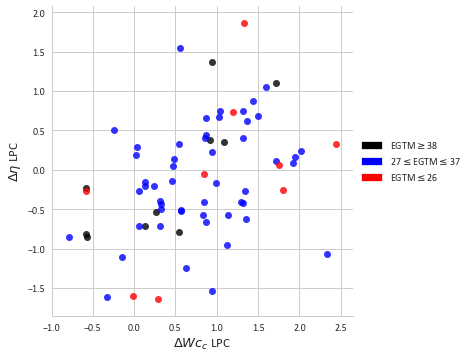

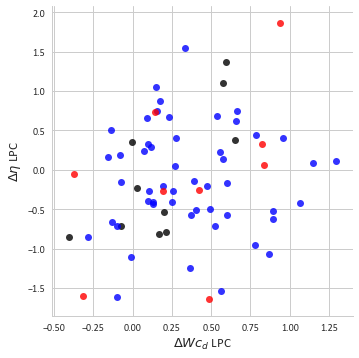

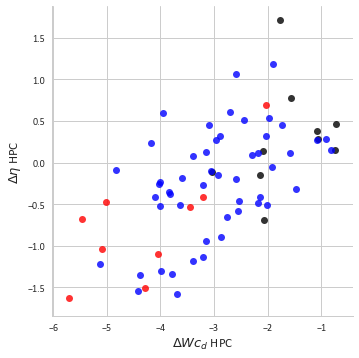

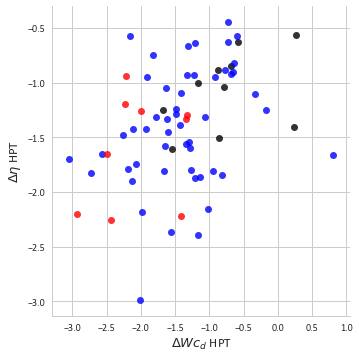

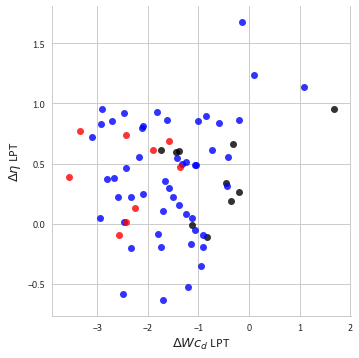

In [183]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/02 AM Simulation.xlsx',
                   'KLM&Clients(NEW)1SV')
mine=dict(GOOD="k",BAD="r",REGULAR="b")



sns.lmplot(y="dEta_is_c_LPC_1 [%]", x="dWc_c_LPC_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False, palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
red_patch = mpatches.Patch(color='red', label='EGTM$\leq$26')
black_patch = mpatches.Patch(color='black', label='EGTM$\geq$38')
blue_patch = mpatches.Patch(color='blue',label='27$\leq$EGTM$\leq$37')
plt.legend(handles=[black_patch,blue_patch,red_patch],loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('$\Delta\eta$ LPC',fontsize=13)
plt.xlabel('$\Delta Wc_c$ LPC',fontsize=13)

sns.lmplot(y="dEta_is_c_LPC_1 [%]", x="dWc_d_LPC_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.ylabel('$\Delta\eta$ LPC',fontsize=13)
plt.xlabel('$\Delta Wc_d$ LPC',fontsize=13)

sns.lmplot(y="dEta_is_HPC_1 [%]", x="dWc_HPC_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.ylabel('$\Delta\eta$ HPC',fontsize=13)
plt.xlabel('$\Delta Wc_d$ HPC',fontsize=13)

sns.lmplot(y="dEta_is_HPT_1 [%]", x="dWc_HPT_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.ylabel('$\Delta\eta$ HPT',fontsize=13)
plt.xlabel('$\Delta Wc_d$ HPT',fontsize=13)

sns.lmplot(y="dEta_is_LPT_1 [%]", x="dWc_LPT_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.ylabel('$\Delta\eta$ LPT',fontsize=13)
plt.xlabel('$\Delta Wc_d$ LPT',fontsize=13)


## Second Shop Regular Type Visit 

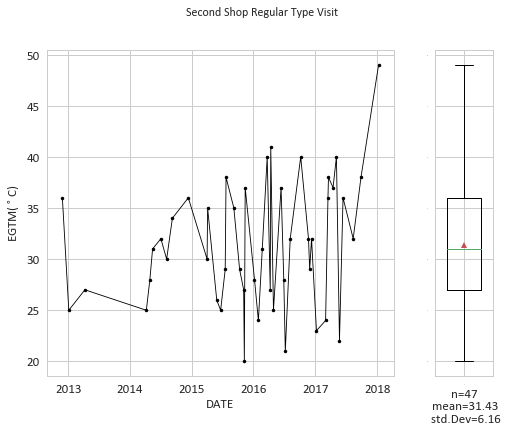

In [184]:

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import gridspec
from pandas import Series, DataFrame, Panel

font = {'family' : 'Calibri',
        'size'   : 15}

df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/01 EGTM Data Base Plots and Analysis.xlsx',
                   '2SV(KLM&Clients)')

x = pd.Series(df['DATE'])
y = pd.Series(df['EGTM'])

f = plt.figure(figsize=(8,6))
gs = gridspec.GridSpec(1,2, width_ratios=[6,1])
plt.grid(axis='y', which="major", linestyle='dotted', linewidth=0.4)

ax1 = plt.subplot(gs[0])
ax1.set(xlabel=('DATE'),ylabel=('EGTM($^\circ$C)'))
ax1.plot_date(x , y, fmt="ko-", markersize=3.5, linewidth=0.85)
ax1.xaxis.label.set_size(13)
ax1.yaxis.label.set_size(13)
ax1.tick_params(axis='both', labelsize=13)

ax2 = plt.subplot(gs[1])
ax2.set(xlabel='n=47\n mean=31.43\n std.Dev=6.16')
ax2.boxplot(df['EGTM'], showmeans=True, widths = 0.6, sym='k.')
ax2.xaxis.label.set_size(13)
ax2.tick_params(axis='both', labelsize=1)

f.suptitle('Second Shop Regular Type Visit')

plt.show()

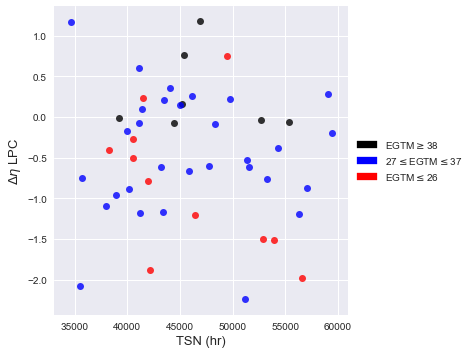

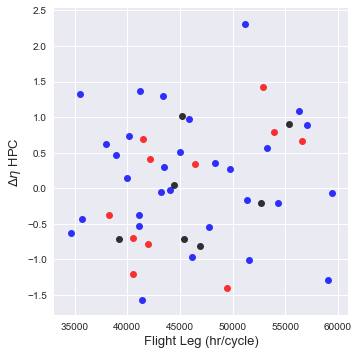

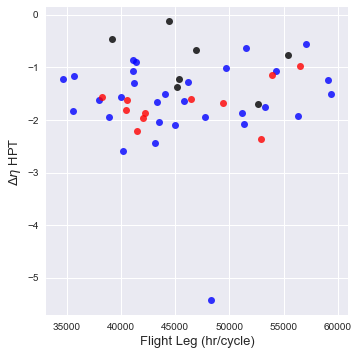

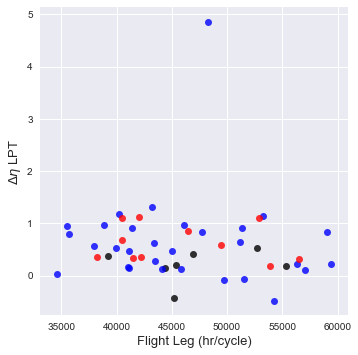

In [23]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/02 AM Simulation.xlsx',
                   'KLM&Clients(NEW)2SV')
mine=dict(GOOD="k",BAD="r",REGULAR="b")



sns.lmplot(x="TSN", y="dEta_is_c_LPC_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False, palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
red_patch = mpatches.Patch(color='red', label='EGTM$\leq$26')
black_patch = mpatches.Patch(color='black', label='EGTM$\geq$38')
blue_patch = mpatches.Patch(color='blue',label='27$\leq$EGTM$\leq$37')
plt.legend(handles=[black_patch,blue_patch,red_patch],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('TSN (hr)',fontsize=13)
plt.ylabel('$\Delta\eta$ LPC',fontsize=13)

sns.lmplot(x="TSN", y="dEta_is_HPC_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.xlabel('Flight Leg (hr/cycle)',fontsize=13)
plt.ylabel('$\Delta\eta$ HPC',fontsize=13)

sns.lmplot(x="TSN", y="dEta_is_HPT_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.xlabel('Flight Leg (hr/cycle)',fontsize=13)
plt.ylabel('$\Delta\eta$ HPT',fontsize=13)

sns.lmplot(x="TSN", y="dEta_is_LPT_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.xlabel('Flight Leg (hr/cycle)',fontsize=13)
plt.ylabel('$\Delta\eta$ LPT',fontsize=13)

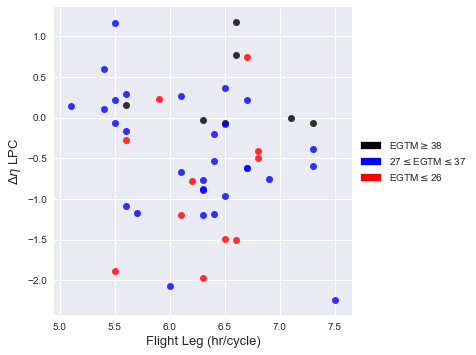

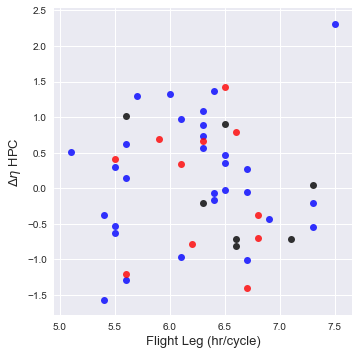

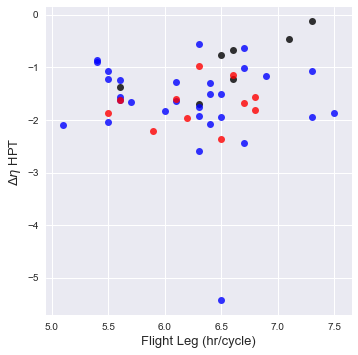

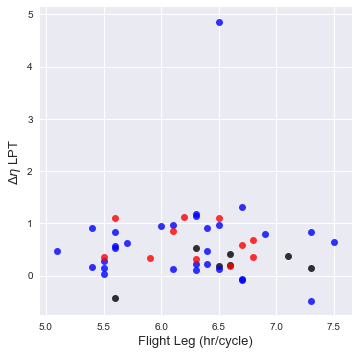

In [21]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/02 AM Simulation.xlsx',
                   'KLM&Clients(NEW)2SV')
mine=dict(GOOD="k",BAD="r",REGULAR="b")



sns.lmplot(x="FLIGHT LEG", y="dEta_is_c_LPC_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False, palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
red_patch = mpatches.Patch(color='red', label='EGTM$\leq$26')
black_patch = mpatches.Patch(color='black', label='EGTM$\geq$38')
blue_patch = mpatches.Patch(color='blue',label='27$\leq$EGTM$\leq$37')
plt.legend(handles=[black_patch,blue_patch,red_patch],loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Flight Leg (hr/cycle)',fontsize=13)
plt.ylabel('$\Delta\eta$ LPC',fontsize=13)

sns.lmplot(x="FLIGHT LEG", y="dEta_is_HPC_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.xlabel('Flight Leg (hr/cycle)',fontsize=13)
plt.ylabel('$\Delta\eta$ HPC',fontsize=13)

sns.lmplot(x="FLIGHT LEG", y="dEta_is_HPT_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.xlabel('Flight Leg (hr/cycle)',fontsize=13)
plt.ylabel('$\Delta\eta$ HPT',fontsize=13)

sns.lmplot(x="FLIGHT LEG", y="dEta_is_LPT_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.xlabel('Flight Leg (hr/cycle)',fontsize=13)
plt.ylabel('$\Delta\eta$ LPT',fontsize=13)

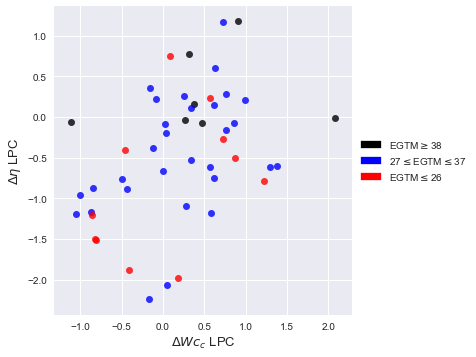

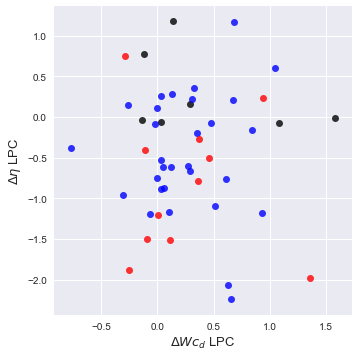

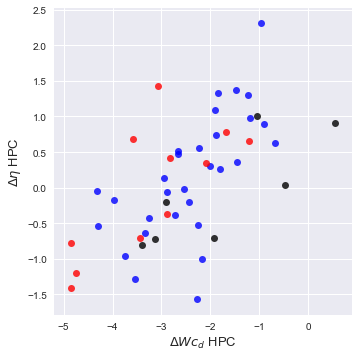

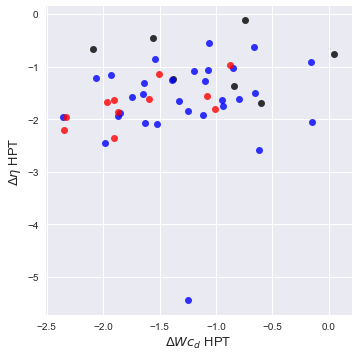

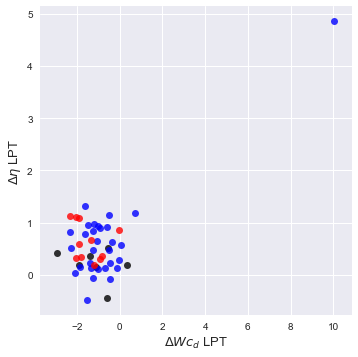

In [22]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/02 AM Simulation.xlsx',
                   'KLM&Clients(NEW)2SV')
mine=dict(GOOD="k",BAD="r",REGULAR="b")



sns.lmplot(y="dEta_is_c_LPC_1 [%]", x="dWc_c_LPC_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False, palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
red_patch = mpatches.Patch(color='red', label='EGTM$\leq$26')
black_patch = mpatches.Patch(color='black', label='EGTM$\geq$38')
blue_patch = mpatches.Patch(color='blue',label='27$\leq$EGTM$\leq$37')
plt.legend(handles=[black_patch,blue_patch,red_patch],loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('$\Delta\eta$ LPC',fontsize=13)
plt.xlabel('$\Delta Wc_c$ LPC',fontsize=13)

sns.lmplot(y="dEta_is_c_LPC_1 [%]", x="dWc_d_LPC_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.ylabel('$\Delta\eta$ LPC',fontsize=13)
plt.xlabel('$\Delta Wc_d$ LPC',fontsize=13)

sns.lmplot(y="dEta_is_HPC_1 [%]", x="dWc_HPC_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.ylabel('$\Delta\eta$ HPC',fontsize=13)
plt.xlabel('$\Delta Wc_d$ HPC',fontsize=13)

sns.lmplot(y="dEta_is_HPT_1 [%]", x="dWc_HPT_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.ylabel('$\Delta\eta$ HPT',fontsize=13)
plt.xlabel('$\Delta Wc_d$ HPT',fontsize=13)

sns.lmplot(y="dEta_is_LPT_1 [%]", x="dWc_LPT_1 [%]", data=df, hue="EGT_GROUP", fit_reg=False,palette=dict(GOOD="k",BAD="r",REGULAR="b"), legend=False)
plt.ylabel('$\Delta\eta$ LPT',fontsize=13)
plt.xlabel('$\Delta Wc_d$ LPT',fontsize=13)

c:\users\klm76343\appdata\local\continuum\anaconda2\lib\site-packages\ipykernel\__main__.py:26: RuntimeWarning: invalid value encountered in true_divide


TypeError: list indices must be integers, not unicode

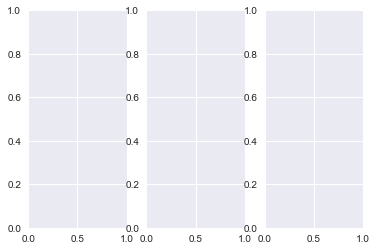

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import ticker

# Load data
df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/01 EGTM Data Base Plots and Analysis.xlsx',
                   'Sheet1')
# Interested Columns
cols = ['EDS','1sv','2sv','3rd']
df['OEM state'] = df['OEM state'].astype('category')

#colors = ['black','red','blue']
#x = [i for i, _ in enumerate(cols)]
#colors = {df['OEM state'].cat.categories[i]: colors[i] for i, _ in enumerate(df['OEM state'].cat.categories)}

# create (X-1) subplots along x axis
fig, axes = plt.subplots(1,len(x)-1, sharey=False)

# Get min, max and range for each column
# Normalize the data for each column
min_max_range = {}
for col in cols:
    min_max_range[col] = [df[col].min(), df[col].max(), np.ptp(df[col])]
    df[col] = np.true_divide(df[col] - df[col].min(), np.ptp(df[col]))
    
# Plot each row
for i, ax in enumerate(axes):
    for idx in df.index:
        EGTM_category = df.loc[idx, 'OEM state']
        ax.plot(x, df.loc[idx, cols], colors[OEM state], )
    ax.set_xlim([x[i], x[i+1]])

# Set the tick positions and labels on y axis for each plot
# Tick positions based on normalised data
# Tick labels are based on original data
def set_ticks_for_axis(dim, ax, ticks):
    min_val, max_val, val_range = min_max_range[cols[dim]]
    step = val_range / float(ticks-1)
    tick_labels = [round(min_val + step * i, 2) for i in range(ticks)]
    norm_min = df[cols[dim]].min()
    norm_range = np.ptp(df[cols[dim]])
    norm_step = norm_range / float(ticks-1)
    ticks = [round(norm_min + norm_step * i, 2) for i in range(ticks)]
    ax.yaxis.set_ticks(ticks)
    ax.set_yticklabels(tick_labels)

for dim, ax in enumerate(axes):
    ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
    set_ticks_for_axis(dim, ax, ticks=3)
    ax.set_xticklabels([cols[dim]])

# Move the final axis' ticks to the right-hand side
ax = plt.twinx(axes[-1])
dim = len(axes)
ax.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
set_ticks_for_axis(dim, ax, ticks=5)
ax.set_xticklabels([cols[-2], cols[-1]])

# Remove space between subplots
plt.subplots_adjust(wspace=0)

plt.legend(
        [plt.Line2D((0,1),(0,0), color=colors[cat]) for cat in df['OEM state'].cat.categories],
        df['OEM state'].cat.categories,
        bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

plt.show()